In [6]:
import pandas as pd
import numpy as np
import pickle
from pytrends.request import TrendReq
from pytrends.dailydata import getDailyData
import datetime
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns
from src.companies_clean import companies_clean

In [8]:
df_moat = pd.read_pickle('data/df_moat2')

In [9]:
df_moat.sample()

,Companies Brand,Brand,Image Name,First Seen,Last Seen,Screenpath,percent_color,read_text,out_vertices,faces
597,Qualtrics,Qualtrics,Qualtrics597.jpg,2018-09-13,2019-06-08,https://moatsearch-data.s3.amazonaws.com/creat...,"{'red': 0, 'green': 0, 'yellow': 0, 'blue': 0....","[FREE, WEBINAR, Future, of, CX, webinar, qualt...",0.210773,0


In [10]:
from datetime import date, timedelta
def create_date_list(start=date(2014, 1, 1),end=date(2019, 6, 20)):
    #creates a list of dates between d1 and d2 to use as an index for the google trends dataframe
    d1 = start  # start date
    d2 = end  # end date

    delta = d2 - d1         # timedelta
    date_list = []
    for i in range(delta.days + 1):
        date_list.append(d1 + timedelta(days=i))
    return date_list

In [15]:
date_list = create_date_list()

In [11]:
master_date_list = create_date_list(start=date(2014, 7, 6),end=date(2019, 6, 23))

In [12]:
df_companies = companies_clean()

In [13]:
df_companies[df_companies['Organization Name']=='Aeroflot']

,Organization Name,Headquarters Location,CB Rank (Company),Founded Date,Company Type,Category Groups,IPO Status,Monthly Visits,Moat Name,Categories_simple,age
983,Aeroflot,"Los Angeles, California, United States","89,024",1923,For Profit,"Science and Engineering, Transportation, Trave...",Private,"9,103,312",Aeroflot,"[Science and Engineering, Transportation, Trav...",96


In [18]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
def pull_monthly(first=datetime.date(year=2014,month=1,day=1),
                 last=datetime.date(year=2019,month=6,day=20), 
                 brand='Epic Games',
                 date_list=date_list):
    
    """
        Pulls indexed google trends for one or multiple companies/keywords by month and returns a list 
        dateframes
        
        Parameters
        ----------
        first : date.time
            the start year requested
        last : date.time
            The last year requested
        brands : list of strings
            The list of brands which will be iterate through 
        date_list : list of dates by day which must include all dates 
            The list of brands which will be iterate through 
        """
    # Login to Google. Only need to run this once, the rest of requests will use the same session.
#     if first_run == True:
    pytrend = TrendReq(hl='en-US', tz=360)
    
    pytrend.build_payload(kw_list=[str(brand)])
#         pytrend.build_payload(kw_list=[i])
    df = pytrend.interest_over_time()
    df = df.reset_index()
    print(df)
   #Converts the google dataframe  
    return df

In [23]:
def clean_trends(df,company):
    df_out = pd.DataFrame()
    a = df[str(company)]
    b = []
    for num, val in enumerate(list(a)):
        if num+1 >= len(a):
            break
        else:
            adder = (a[num+1] - a[num])/7
            if adder == 0:
                b.append(np.zeros(7,)+a[num])
            else: 
                b.append(np.arange(a[num],a[num+1],adder))
    df_out[str(company)] = np.concatenate(b).ravel().tolist()
    return df_out

In [24]:
# df_google = pd.DataFrame()

In [87]:
# for company in df_moat['Brand'][2447:].unique():
#     try:
#         df_google[str(company)]=clean_trends(pull_monthly(brand=company),company)
#         time.sleep(60)
#     except:
#         continue

In [88]:
# df_google

In [89]:
# df_moat['Brand'] = df_moat['Brand'].apply(lambda x: x.replace('Prezi, inc', 'Prezi'))


In [90]:
# df_moat[df_moat['Brand'].str.contains('Prezi')]

In [91]:
# df_moat['Brand'][893:]

In [94]:
# df_moat['Brand']

In [32]:
df_google['Date'] = pd.Series(master_date_list)

In [228]:
# df_google.drop(1813, inplace=True)

In [31]:
master_date_list=master_date_list[0:1813]

IndexError: list index out of range

In [230]:
df_google.sample()

,Epic Games,UBER,Uber Rewards,UBER Eats,UBER Driver,Crowdstrike,Impossible Foods,Beyond Meat,Nvidia,Geforce,...,Scribd,Capital One,Capital One BUYPOWER Card,Capital One Spark Business,Capital One 360,DroneDeploy,Moogsoft,Versa Networks,Peerspace,Sunpower
438,1.0,44.0,8.857143,1.0,39.428571,2.857143,3.571429,1.0,70.714286,73.0,...,78.571429,93.142857,43.0,23.285714,74.0,20.857143,17.0,42.142857,6.0,60.857143


In [231]:
df_moat.sample()

,Companies Brand,Brand,Image Name,First Seen,Last Seen,Screenpath
3930,Matterport,Matterport,Matterport3930.jpg,2019-03-26,2019-06-25,https://moatsearch-data.s3.amazonaws.com/creat...


In [232]:
df_google.sample()

,Epic Games,UBER,Uber Rewards,UBER Eats,UBER Driver,Crowdstrike,Impossible Foods,Beyond Meat,Nvidia,Geforce,...,Scribd,Capital One,Capital One BUYPOWER Card,Capital One Spark Business,Capital One 360,DroneDeploy,Moogsoft,Versa Networks,Peerspace,Sunpower
654,1.0,54.857143,9.285714,2.571429,50.142857,2.428571,3.285714,1.0,51.714286,53.142857,...,60.714286,67.428571,48.142857,30.571429,65.285714,27.714286,22.714286,30.571429,14.142857,66.142857


In [277]:
df_moat.sample()

,Companies Brand,Brand,Image Name,First Seen,Last Seen,Screenpath
3114,Sisense,Sisense,Sisense3114.jpg,2018-03-28,2018-03-28,https://moatsearch-data.s3.amazonaws.com/creat...


In [62]:
df_google['date'] = master_date_list

In [63]:
df_google.set_index(['date'], inplace=True)

In [65]:
df_google.to_pickle('data/df_google2')

In [66]:
df_t_google = df_google.T.reset_index()

In [67]:
df_t_google.rename({'index': 'Brand'}, axis=1, inplace=True)

In [68]:
df_t_google.sample()

date,Brand,2014-07-06,2014-07-07,2014-07-08,2014-07-09,2014-07-10,2014-07-11,2014-07-12,2014-07-13,2014-07-14,...,2019-06-13,2019-06-14,2019-06-15,2019-06-16,2019-06-17,2019-06-18,2019-06-19,2019-06-20,2019-06-21,2019-06-22
659,Betfair,42,42.4286,42.8571,43.2857,43.7143,44.1429,44.5714,45,45.2857,...,32,32,32,31.8571,31.7143,31.5714,31.4286,31.2857,31.1429,31


In [70]:
sum(sum(np.array(df_t_google.isnull())))

0

In [71]:
brand_list_google = set(df_t_google['Brand'].unique())

In [72]:
brand_list_moat = set(df_moat['Brand'].unique())

In [73]:
len(brand_list_google), len(brand_list_moat)

(858, 885)

In [77]:
# list(brand_list_moat - brand_list_google)

In [78]:
# df_moat[df_moat['Brand'].str.contains('AnheuserBusch')]

In [454]:
# df_t_google.drop(346, inplace=True)
# df_t_google.drop(104, inplace=True)
# df_t_google.drop(100, inplace=True)

In [467]:
# df_moat.drop(1242, inplace=True)
# df_moat.drop(1269, inplace=True)
# df_moat.drop(1268, inplace=True)
# df_moat.drop(1267, inplace=True)
# df_moat.drop(1266, inplace=True)
# df_moat.drop(1265, inplace=True)
# df_moat.drop(1263, inplace=True)
# df_moat.drop(1262, inplace=True)
# df_moat.drop(1261, inplace=True)
# df_moat.drop(1250, inplace=True)

In [79]:
trend_moat = pd.merge(df_t_google, df_moat, how='left', left_on = 'Brand', right_on = 'Brand')

In [96]:

trend_moat['Last Seen'] =  pd.to_datetime(trend_moat['Last Seen'])
trend_moat['First Seen'] =  pd.to_datetime(trend_moat['First Seen'])
trend_moat['before_campaign'] = trend_moat['First Seen'] - pd.DateOffset(months=4)
trend_moat['Campaign Length'] = trend_moat['Last Seen'] - trend_moat['First Seen']
trend_moat['Campaign Length'] = trend_moat['Campaign Length'].dt.days

In [98]:
trend_moat['before_campaign'] =  pd.to_datetime(trend_moat['before_campaign'])
trend_moat['First Seen'] =  pd.to_datetime(trend_moat['First Seen'])
# trend_moat['after_campaign'] =  pd.to_datetime(trend_moat['after_campaign'])
trend_moat['Last Seen'] =  pd.to_datetime(trend_moat['Last Seen'])

In [99]:
# datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').date()

In [604]:
trend_moat['Last Seen'] = trend_moat['Last Seen'].apply(lambda x: max(datetime.date(2019, 6, 22), datetime.date(2019, 6, 22)))

In [100]:
trend_moat['before_score'] = 0
trend_moat['campaign_score'] = 0
trend_moat['after_score'] = 0

In [111]:
trend_moat.drop(0, inplace=True)

In [113]:
for row in range(0,len(trend_moat)):
    score_list = [[],[],[]]
    before_score = create_date_list(start=trend_moat['before_campaign'].iloc[row].date(), end=trend_moat['First Seen'].iloc[row].date())
    campaign_score = create_date_list(start=trend_moat['First Seen'].iloc[row].date(), end=trend_moat['Last Seen'].iloc[row].date())
    #after_score = create_date_list(start=trend_moat['Last Seen'].iloc[row].date(), end=trend_moat['after_campaign'].iloc[row].date())
    for date_iter in list(trend_moat)[1:1814]:
        if date_iter in before_score:
            score_list[0].append(trend_moat[date_iter].iloc[row])
        if date_iter in campaign_score:
            score_list[1].append(trend_moat[date_iter].iloc[row])
#         if date_iter in after_score:
#             score_list[2].append(trend_moat[date_iter].iloc[row])
    trend_moat['before_score'].iloc[row] = np.mean(score_list[0])
    trend_moat['campaign_score'].iloc[row] = np.mean(score_list[1])
#     trend_moat['after_score'].iloc[row] = np.mean(score_list[2])

/Users/ian/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ian/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ian/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [114]:
trend_moat.to_pickle('data/trend_moat2')

In [133]:
trend_moat['before_score'].mean(), trend_moat['campaign_score'].mean(), trend_moat['after_score'].mean()

(48.878292506345446, 48.58955123449521, 0.0)

In [117]:
np.where((trend_moat['campaign_score'].isnull()))[0]

array([  11,   14,   16,   17,   19,   32,   50,   52,   53,   54,   55,
         60,   62,   63,   73,   80,   81,   82,   83,   84,   85,   86,
         87,   88,   91,  118,  119,  120,  121,  170,  189,  212,  213,
        214,  215,  216,  219,  220,  221,  227,  233,  234,  235,  236,
        237,  238,  239,  240,  242,  255,  257,  258,  259,  260,  261,
        264,  325,  328,  330,  354,  372,  375,  379,  381,  389,  403,
        404,  435,  442,  454,  456,  459,  460,  463,  565,  566,  626,
        670,  671,  672,  674,  687,  688,  689,  729,  730,  764,  771,
        772,  820,  822,  823,  827,  828,  829,  978,  979,  982,  992,
        998, 1006, 1007, 1017, 1018, 1043, 1050, 1052, 1056, 1063, 1071,
       1073, 1074, 1101, 1103, 1219, 1220, 1222, 1224, 1226, 1227, 1228,
       1249, 1250, 1260, 1275, 1307, 1318, 1329, 1330, 1331, 1332, 1408,
       1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1468, 1469,
       1471, 1473, 1478, 1488, 1510, 1512, 1527, 15

In [136]:
trend_moat = trend_moat.drop(list(np.where((trend_moat['before_score'].isnull()))[0]))  

In [139]:
# trend_moat.reset_index(inplace=True)

In [129]:
trend_moat.drop(list((np.where((trend_moat['campaign_score'].isnull())))[0]),inplace=True)

In [9]:
trend_moat.reset_index(inplace=True)

In [127]:
np.where(trend_moat['after_score'].isnull())

(array([], dtype=int64),)

/Users/ian/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


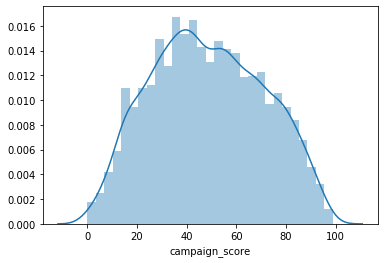

In [130]:
sns.distplot(trend_moat['campaign_score'])

ValueError: cannot convert float NaN to integer

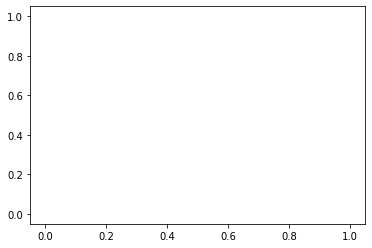

In [131]:
sns.distplot(trend_moat['before_score'])

In [140]:
# sns.distplot(trend_moat['after_score'])

In [170]:
list(df_moat)

['Companies Brand',
 'Brand',
 'Image Name',
 'First Seen',
 'Last Seen',
 'Screenpath',
 'percent_color',
 'read_text',
 'out_vertices',
 'faces']

In [568]:
list(trend_moat)[1813:1816]

[datetime.date(2019, 6, 20),
 datetime.date(2019, 6, 21),
 datetime.date(2019, 6, 22)]

In [141]:
test = trend_moat[['Brand','before_score','campaign_score']].groupby('Brand').mean()

In [144]:
from scipy import stats
stats.ttest_ind(trend_moat['before_score'], trend_moat['campaign_score'], axis=0, equal_var=False)

Ttest_indResult(statistic=1.1948844087176154, pvalue=0.23215052603800707)

In [145]:
stats.ttest_ind(trend_moat['before_score'], trend_moat['campaign_score'])

Ttest_indResult(statistic=1.1948844087176154, pvalue=0.23215047082486914)

In [171]:
# list(df_google)

In [172]:
new = ['Companies Brand',
 'Image Name',
 'First Seen',
 'Last Seen',
 'before_campaign',
 'before_score',
 'campaign_score',
 'percent_color',
 'read_text',
 'out_vertices',
 'faces',        
 'Brand']

In [173]:
final_df = trend_moat[new]

In [215]:
final_df.to_pickle('final_df')

In [151]:
import plotly 
plotly.tools.set_credentials_file(username='razzjazz', api_key='lz5kvoOXzYxkk4tdjFh0')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

In [153]:
trend_moat = pd.read_pickle('data/trend_moat2')

In [154]:
data1 = trend_moat['before_score']
data2 = trend_moat['campaign_score']

In [155]:
x = np.linspace(-4, 5, 160)
y1 = scipy.stats.norm.pdf(x)
y2 = scipy.stats.norm.pdf(x, loc=2)

trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Mean of 0'
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Mean of 2'
)

data = [trace1, trace2]

py.iplot(data, filename='normal-dists-plot')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~razzjazz/0 or inside your plot.ly account where it is named 'normal-dists-plot'


/Users/ian/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning:

Consider using IPython.display.IFrame instead



In [175]:
final_df['campaign_length'] = final_df['Last Seen'] - final_df['First Seen']

/Users/ian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [158]:
df_companies = pd.read_pickle('data/df_companies')

In [176]:
no_vis_df = pd.merge(final_df, df_companies, how='left', left_on = 'Companies Brand', right_on = 'Moat Name')

In [181]:
no_vis_df['target_value']= no_vis_df['campaign_score'] - no_vis_df['before_score']

In [182]:
no_vis_df['target'] = no_vis_df['target_value']>3

In [183]:
no_vis_df['target'].sum(), no_vis_df['target'].count()

(2149, 9270)

/Users/ian/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning:

invalid value encountered in greater_equal

/Users/ian/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning:

invalid value encountered in less_equal



<function matplotlib.pyplot.show(*args, **kw)>

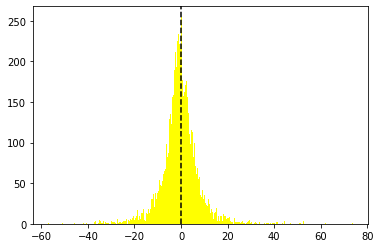

In [184]:
plt.hist(no_vis_df['target_value'], bins=400, color='yellow')
plt.axvline(x=0, color='k', linestyle='--')
plt.show

/Users/ian/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in greater

/Users/ian/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in less



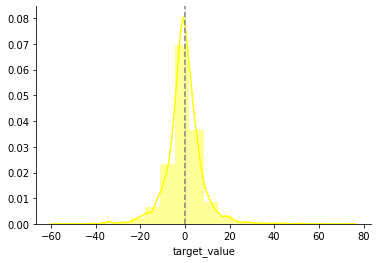

In [185]:
sns.distplot(no_vis_df['target_value'],bins=20, color='yellow', hist_kws=dict(edgecolor="k", linewidth=0))
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axvline(x=0, color='grey', linestyle='--')

In [187]:
no_vis_df.sample()

,Companies Brand,Image Name,First Seen,Last Seen,before_campaign,before_score,campaign_score,percent_color,read_text,out_vertices,...,Brand,campaign_length,Organization Name,Categories,Headquarters Location,Description,Founded,Moat Name,target_value,target
4372,Thomson-Reuters,ThomsonReuters4300.jpg,2019-07-04,2019-07-25,2019-03-04,42.854569,NaN,"{'red': 0, 'green': 0, 'yellow': 0, 'blue': 0,...","[Move, ahead, with, confidence., Bring, unseen...",0.10148,...,ThomsonReuters,21 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [191]:
# image_data['color_round'] = image_data['color_round'].apply(lambda x : dict(eval(x)) )
image_data2 = no_vis_df['percent_color'].apply(pd.Series )
image_data_clean = pd.concat([no_vis_df, image_data2], axis=1).drop('percent_color', axis=1)


In [204]:
import pandas as pd
import numpy as np
# from code.load_enron import build_data_frame
# from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


In [207]:
image_data_clean['read_text'] = image_data_clean['read_text'].apply(lambda x : ' '.join(x))

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

# def vectorize_tfidf()
tfidf = TfidfVectorizer(stop_words='english')
document_tfidf_matrix = tfidf.fit_transform(image_data_clean['read_text'])
# print(sorted(tfidf.vocabulary_))
# print(document_tfidf_matrix.todense())

In [209]:
all_words_df = pd.DataFrame(document_tfidf_matrix.todense(), columns=tfidf.vocabulary_)

In [211]:
with_tfidf = pd.concat([image_data_clean, all_words_df], axis=1).drop('read_text', axis=1)

In [212]:
with_tfidf.drop('words', axis=1, inplace=True)
with_tfidf.drop('target_value', axis=1, inplace=True)

In [213]:
with_tfidf.drop(['Companies Brand','Image Name','Brand','Organization Name','Categories','Headquarters Location','Description','Founded','Moat Name'],axis=1,inplace=True)

In [214]:
from sklearn.cross_validation import train_test_split
# 4. Create a train test split of your dataframe (70/30).
train_index, test_index = train_test_split(range(4468))
train_df = with_tfidf_no_date.iloc[train_index]
test_df = with_tfidf_no_date.iloc[test_index]


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [158]:
with_tfidf['campaign_length'] = with_tfidf['campaign_length'].dt.days

In [179]:
with_tfidf_no_date.drop(['First Seen','Last Seen','before_campaign','after_campaign'], axis=1, inplace=True)

In [188]:
with_tfidf_no_date.drop('after_score', axis=1, inplace=True)

In [231]:
from sklearn.linear_model import SGDClassifier
X = train_df.drop('target', axis=1)
y = train_df['target'].iloc[:,0]
clf = SGDClassifier(loss="log", penalty="l2", max_iter=5)
clf.fit(X, y)   
# SGDClassifier(alpha=0.0001, average=False, class_weight=None,
#             epsilon=0.1, eta0=0.0, fit_intercept=True,
#            l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
#             n_jobs=-1, penalty='l2', power_t=0.5,
#             shuffle=True, tol=0.001,
#             verbose=0, warm_start=False)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [233]:
predict = clf.predict_proba(test_df.drop('target', axis=1)) 

/Users/ian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning:

overflow encountered in exp



In [201]:
with_tfidf_no_date.isnull().sum().sum()

0

In [239]:
from sklearn.metrics import accuracy_score

In [245]:
accuracy_score(test_df['target'].iloc[:,0], predict)

0.09400179051029543

In [241]:
test_df['target'].iloc[:,0]

2712     True
2894     True
2467    False
2282     True
902     False
2947    False
217     False
371     False
2028    False
982     False
3237    False
868     False
747     False
2246    False
4439     True
4119    False
3049    False
3138    False
2744    False
3978    False
2449    False
3152    False
4284    False
1483    False
4018    False
4420    False
2401     True
3920     True
3519    False
607      True
        ...  
3975    False
242      True
1405    False
683     False
595     False
3805     True
2381     True
1994     True
1045     True
1079     True
3406    False
2440     True
4148     True
4369    False
765     False
324     False
4405    False
3426    False
2608    False
2436    False
3790    False
1231     True
1692     True
3       False
4290    False
2295     True
3822     True
1729    False
1241     True
383     False
Name: target, Length: 1117, dtype: bool

In [244]:
predict = predict[:,0] == 1

In [248]:
image_data_clean['words'].to_pickle('word_cloud')